In [2]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd
import numpy as np

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# SKLEARN IS OUR MACHINE LEARNING PACKAGE
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR
from sklearn.ensemble import RandomForestRegressor

# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# Good ol statsmodels
import statsmodels.api as sm

# Specific root mean squared error for stats models
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot


In [3]:
df = pd.read_csv('Sleep_Data_Sampled.csv')

In [4]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,35,Doctor,6.65,7,50,7,Normal Weight,120/80,71,7100,Healthy
1,2,Male,42,Teacher,6.90,8,52,4,Normal,135/90,66,7000,Healthy
2,3,Male,34,Software Engineer,6.95,7,66,6,Overweight,126/83,74,6100,Healthy
3,4,Male,32,Doctor,6.90,6,52,7,Normal,120/80,71,6500,Healthy
4,5,Male,37,Lawyer,6.85,7,60,6,Normal,125/80,71,6500,Healthy


In [7]:
# Example Dataset (Replace with actual data)
np.random.seed(42)
df = pd.DataFrame({
    'Sleep Duration': np.random.uniform(4, 10, 100),
    'Stress Level': np.random.randint(1, 10, 100),
    'Age': np.random.randint(18, 65, 100),
    'Heart Rate': np.random.randint(60, 100, 100),
    'Physical Activity Level': np.random.randint(1, 5, 100),
    'Daily Steps': np.random.randint(2000, 10000, 100),
    'Quality of Sleep': np.random.uniform(1, 10, 100)  # Target variable
})
print(df)

    Sleep Duration  Stress Level  Age  Heart Rate  Physical Activity Level  \
0         6.247241             7   19          82                        4   
1         9.704286             1   18          61                        3   
2         8.391964             4   29          86                        2   
3         7.591951             4   22          61                        2   
4         4.936112             5   54          85                        3   
..             ...           ...  ...         ...                      ...   
95        6.962774             7   63          82                        2   
96        7.136397             3   41          69                        4   
97        6.565246             7   49          64                        1   
98        4.152515             9   64          95                        4   
99        4.647349             4   39          93                        1   

    Daily Steps  Quality of Sleep  
0          5766          7.

In [6]:
# Features and Target
X = df[['Sleep Duration', 'Stress Level', 'Age', 'Heart Rate',
        'Physical Activity Level', 'Daily Steps']]
y = df['Quality of Sleep']

# Split into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Features and Target
X = df[['Sleep Duration', 'Stress Level', 'Age', 'Heart Rate',
        'Physical Activity Level', 'Daily Steps']]
y = df['Quality of Sleep']

# Split into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
 
# Train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [10]:
# Predictions
y_pred_lr = linear_model.predict(X_test)

# Evaluate Linear Regression
print("Linear Regression Results:")
print(f"R²: {metrics.r2_score(y_test, y_pred_lr):.2f}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)):.2f}")


Linear Regression Results:
R²: 0.08
RMSE: 2.92


In [11]:
# Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': linear_model.coef_
})
print(coefficients)


                   Feature  Coefficient
0           Sleep Duration     0.204584
1             Stress Level     0.121745
2                      Age    -0.002259
3               Heart Rate    -0.003597
4  Physical Activity Level     0.343459
5              Daily Steps     0.000225


Random Forest Regression

In [12]:
# Train the model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [13]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest Regression
print("\nRandom Forest Results:")
print(f"R²: {metrics.r2_score(y_test, y_pred_rf):.2f}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)):.2f}")



Random Forest Results:
R²: 0.04
RMSE: 2.99


In [14]:
# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)



Feature Importances:
                   Feature  Importance
5              Daily Steps    0.285487
0           Sleep Duration    0.223897
2                      Age    0.132849
3               Heart Rate    0.123062
1             Stress Level    0.122588
4  Physical Activity Level    0.112117


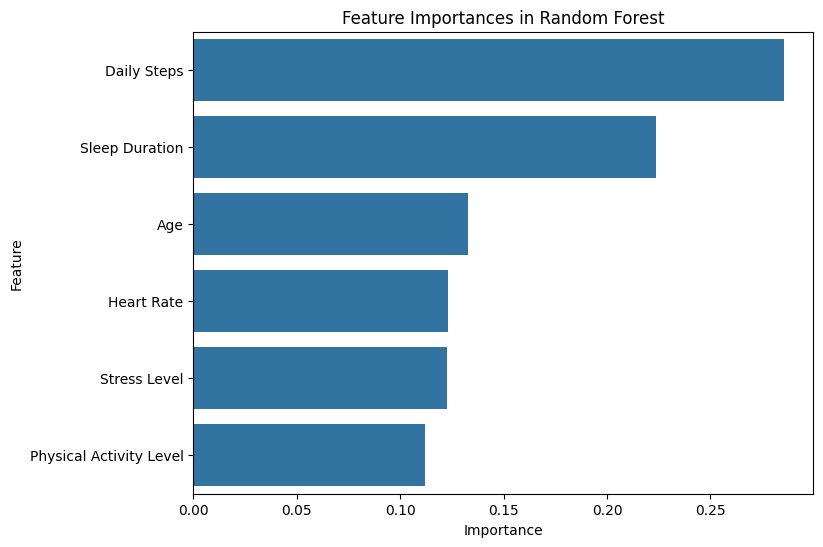

In [15]:
# Visualize Feature Importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances in Random Forest')
plt.show()
